<a href="https://colab.research.google.com/github/lazy-wolf/Sample/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 4**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 4-12-2023
```

**Import Libraries**

In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, Reshape, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

**Importing Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = x_train[:10000], y_train[:10000]

In [4]:
x_test, y_test = x_train[:2000], y_train[:2000]

**Dataset Info**

[cifar10 datset link](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

*https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data*

In [5]:
x_train.shape

(10000, 32, 32, 3)

In [6]:
x_test.shape

(2000, 32, 32, 3)

**Data Preprocessing**

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**Auto-Encoder (AE) Implementation**

**Auto-Encoder Model Architecture**

In [8]:
#Input Layer
input_img = Input(shape=(32, 32, 3))
#Encoding Layer
x = Reshape((32*32*3,))(input_img)
x = Dense(3000, activation='relu')(x)
x = Dense(1500, activation='relu')(x)
x = Dense(750, activation='relu')(x)
encoded = Dense(350, activation='relu')(x)
#Decoding Layer
x = Dense(750, activation='relu')(encoded)
x = Dense(1500, activation='relu')(x)
x = Dense(3000, activation='relu')(x)
x = Dense(32*32*3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)
#AutoEncoder Model
autoencoder = Model(input_img, decoded)

**Compiling the Auto-Encoder**

In [9]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 reshape (Reshape)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 350)               262850    
                                                                 
 dense_4 (Dense)             (None, 750)               263250

**Auto-Encoder Training**

In [10]:
#Training the AutoEncoder Model
history = autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=50, batch_size=32)

Epoch 1/50
313/313 [==============================] - 15s 20ms/step - loss: 0.0489 - val_loss: 0.0381
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0374 - val_loss: 0.0375
Epoch 3/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0372 - val_loss: 0.0370
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0372 - val_loss: 0.0368
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0362 - val_loss: 0.0342
Epoch 6/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0331 - val_loss: 0.0328
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0329 - val_loss: 0.0331
Epoch 8/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0315 - val_loss: 0.0306
Epoch 9/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0307 - val_loss: 0.0303
Epoch 10/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0305 - val_l

In [11]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

**Plot Training History**


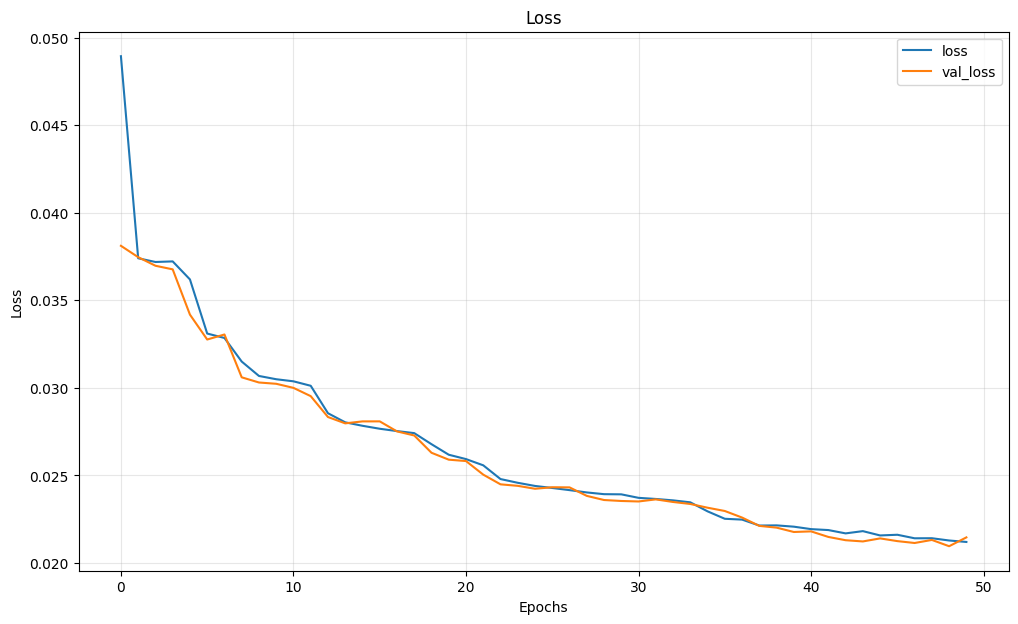

In [12]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

**Auto-Encoder Evaluation**

In [13]:
results=autoencoder.evaluate(x_test, x_test)
print("Test Loss MSE : ", results)

63/63 [==============================] - 0s 3ms/step - loss: 0.0215
Test Loss MSE :  0.02145995944738388


**Auto Encoder Test Dataset Reconstruction**

In [14]:
x_test_pred = autoencoder.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [15]:
def calculate_reconstruction_losses(original, reconstructed):
    mse_loss = tf.keras.losses.mean_squared_error(original.flatten(), reconstructed.flatten()).numpy()
    bce_loss = tf.keras.losses.binary_crossentropy(original.flatten(), reconstructed.flatten()).numpy()
    return mse_loss, bce_loss

**Calculate Reconstruction Losses**

In [16]:
calculate_reconstruction_losses(x_test, x_test_pred)

(0.021459961, 0.6017049)

**Reconstruction Quality : Auto-Encoder**

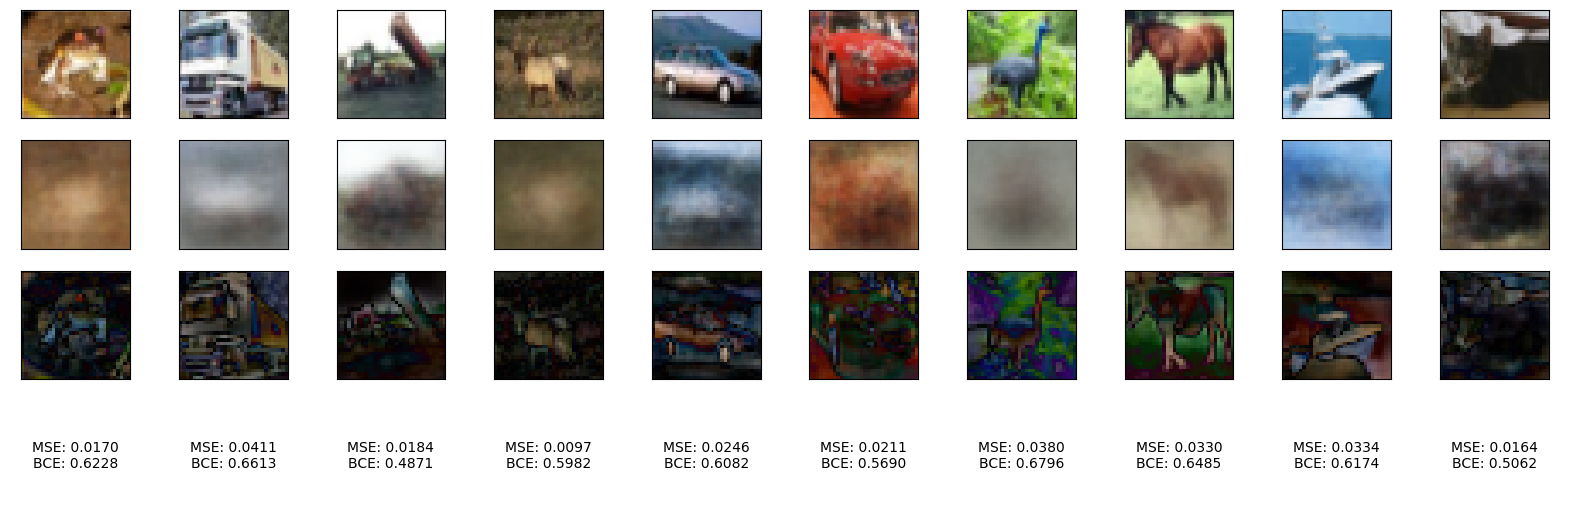

In [17]:
n = 10  # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test[i]
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i]
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

**Hyperparameter Tuning**



```
# Hyperparameters Choosed : Additional Layer, Learning Rate, Encoding Dimensionility/ Latent Space Dimensionilty
```



In [18]:
def hyperparameter_tuning_strategy(cofig, x_train, x_test):
  additional_layer, learning_rate, encoding_dim = config
  possible_combinations = list(itertools.product(additional_layer, learning_rate, encoding_dim))
  print("*"*25)
  print(f"Possible No.of Combinations : {possible_combinations}")
  print("*"*25)
  hist = []
  for i in range(len(possible_combinations)):
    print("*"*25)
    print(f"Combination : {i+1}")
    print("*"*25)
    additional_layer, learning_rate, encoding_dim = possible_combinations[i]
    #Input Layer
    input_img = Input(shape=(32, 32, 3))
    #Encoding Layer
    x = Reshape((32*32*3,))(input_img)
    x = Dense(3000, activation='relu')(x)
    if additional_layer:
      x = Dense(1500, activation='relu')(x)
    x = Dense(750, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    #Decoding Layer
    x = Dense(750, activation='relu')(encoded)
    if additional_layer:
      x = Dense(1500, activation='relu')(x)
    x = Dense(3000, activation='relu')(x)
    x = Dense(32*32*3, activation='sigmoid')(x)
    decoded = Reshape((32, 32, 3))(x)
    #AutoEncoder Model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    #Training the AutoEncoder Model
    autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=50, batch_size=32)
    test_loss = autoencoder.evaluate(x_test, x_test)
    hist.append(list((additional_layer, learning_rate, encoding_dim, test_loss)))
    print(f"Combination : {i+1} -> {possible_combinations[i]} test_mse : {test_loss}")
    print("*"*25)
    print("*"*25)
  return hist


**Different HyperParameter Cofigurations for Tuning**

In [19]:
config = [[True, False], [0.001, 0.002], [175, 350]]



**Hyperparameter Tuning**

In [20]:
hist = hyperparameter_tuning_strategy(config, x_train, x_test)

*************************
Possible No.of Combinations : [(True, 0.001, 175), (True, 0.001, 350), (True, 0.002, 175), (True, 0.002, 350), (False, 0.001, 175), (False, 0.001, 350), (False, 0.002, 175), (False, 0.002, 350)]
*************************
*************************
Combination : 1
*************************
Epoch 1/50
313/313 [==============================] - 6s 12ms/step - loss: 0.0457 - val_loss: 0.0369
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0338 - val_loss: 0.0329
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 0.0322 - val_loss: 0.0308
Epoch 4/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0307 - val_loss: 0.0314
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0304 - val_loss: 0.0294
Epoch 6/50
313/313 [==============================] - 4s 11ms/step - loss: 0.0288 - val_loss: 0.0279
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.02

**Results Comparison on the basis of Validation Loss**

In [21]:
hist_hp_comb_ae = pd.DataFrame(hist, columns=["Additional Layer", "Learning Rate", "Encoding Dimesnionality/Latent Space Dimensionality","Validation Loss AE"])
hist_hp_comb_ae = hist_hp_comb_ae.sort_values(by=["Validation Loss AE"], ascending=True)
hist_hp_comb_ae

,Additional Layer,Learning Rate,Encoding Dimesnionality/Latent Space Dimensionality,Validation Loss AE
4,False,0.001,175,0.006970
5,False,0.001,350,0.007680
1,True,0.001,350,0.012188
0,True,0.001,175,0.013148
7,False,0.002,350,0.014031
3,True,0.002,350,0.019772
6,False,0.002,175,0.021205
2,True,0.002,175,0.025948


**Reconstruction Quality Changes After HyperParameter Tuning**

In [22]:
print("*"*25)
print(f"----Best Combination---- \n Additional Layer = {hist_hp_comb_ae.iloc[0,0]}\n Learning Rate = {hist_hp_comb_ae.iloc[0,1]}\n Encoding Dimesnionality/Latent Sapce Dimensionality = {hist_hp_comb_ae.iloc[0,2]}\n")
print("*"*25)
print("*"*25)
before_mse = np.round(results, 4)
after_mse = np.round(hist_hp_comb_ae.iloc[0, 3], 4)
print(f'Results Before Tunning:\n Test Loss MSE: {before_mse}\n')
print(f'Results After Tunning:\n Test Loss MSE: {after_mse}\n')
print(f'{np.round((before_mse-after_mse)*100/before_mse)}% Reconstruction Quality Improvement')

*************************
----Best Combination---- 
 Additional Layer = False
 Learning Rate = 0.001
 Encoding Dimesnionality/Latent Sapce Dimensionality = 175

*************************
*************************
Results Before Tunning:
 Test Loss MSE: 0.0215

Results After Tunning:
 Test Loss MSE: 0.007

67.0% Reconstruction Quality Improvement


**Best Hyperparameters for Auto-Encoder after Tuning**

In [23]:
additional_layer, learning_rate, encoding_dim = list(hist_hp_comb_ae.iloc[0, :3])

**Auto-Encoder (Best Hyperparameters) Architecture**

In [24]:
#Input Layer
input_img = Input(shape=(32, 32, 3))
#Encoding Layer
x = Reshape((32*32*3,))(input_img)
x = Dense(3000, activation='relu')(x)
if additional_layer:
  x = Dense(1500, activation='relu')(x)
x = Dense(750, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
#Decoding Layer
x = Dense(750, activation='relu')(encoded)
if additional_layer:
  x = Dense(1500, activation='relu')(x)
x = Dense(3000, activation='relu')(x)
x = Dense(32*32*3, activation='sigmoid')(x)
decoded = Reshape((32, 32, 3))(x)

**Compiling the Auto-Encoder (Best Hyperparameters)**

In [25]:
#AutoEncoder Model
autoencoder_best = Model(input_img, decoded)
autoencoder_best.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
autoencoder_best.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 reshape_18 (Reshape)        (None, 3072)              0         
                                                                 
 dense_64 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_65 (Dense)            (None, 750)               2250750   
                                                                 
 dense_66 (Dense)            (None, 175)               131425    
                                                                 
 dense_67 (Dense)            (None, 750)               132000    
                                                                 
 dense_68 (Dense)            (None, 3000)              2253

**Autoencoder - Encoder Model (Best Hyperparameters)**

In [26]:
# Define the encoder model
ae_encoder_best = Model(input_img, encoded)

**Auto-Encoder (Best Hyperparameters) Training**

In [27]:
#Training the AutoEncoder Model
history = autoencoder_best.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=50, batch_size=32)


Epoch 1/50
313/313 [==============================] - 5s 11ms/step - loss: 0.0406 - val_loss: 0.0311
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0292 - val_loss: 0.0261
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0248 - val_loss: 0.0238
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0232 - val_loss: 0.0224
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0222 - val_loss: 0.0214
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0205 - val_loss: 0.0201
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0199 - val_loss: 0.0197
Epoch 8/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0196 - val_loss: 0.0195
Epoch 9/50
313/313 [==============================] - 3s 9ms/step - loss: 0.0192 - val_loss: 0.0189
Epoch 10/50
313/313 [==============================] - 3s 10ms/step - loss: 0.0189 - val_loss:

**Plot Training History**

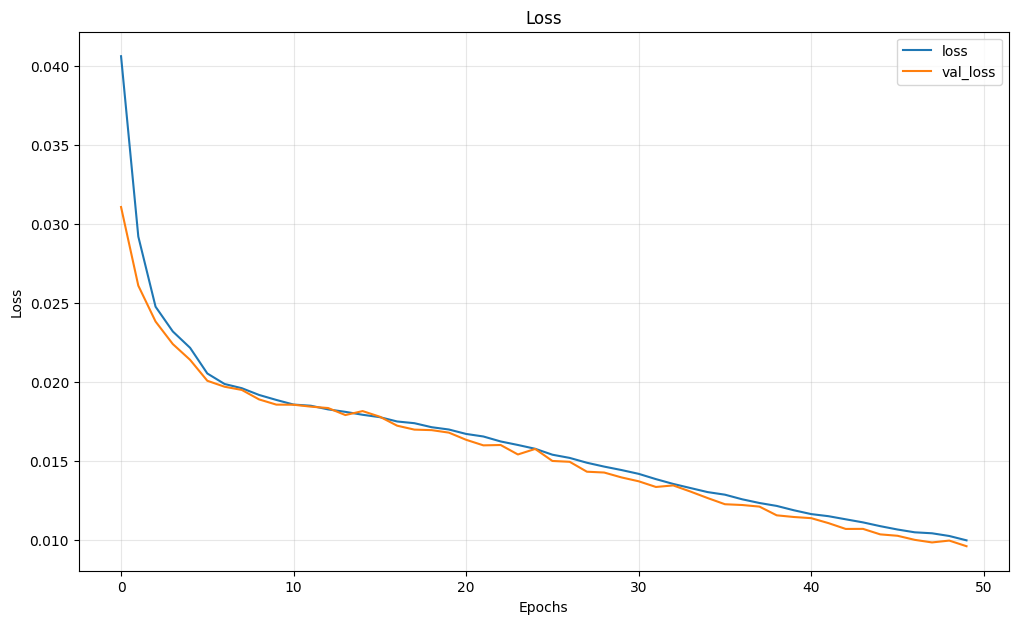

In [28]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

**Auto-Encoder (Best Hyperparameters) Evaluation**

In [29]:
test_loss = autoencoder_best.evaluate(x_test, x_test)
print("Test Loss MSE : ", test_loss)

63/63 [==============================] - 0s 4ms/step - loss: 0.0096
Test Loss MSE :  0.009593413211405277


**Auto Encoder (Best Hyperparameters) Test Dataset Reconstruction**

In [30]:
x_test_pred = autoencoder_best.predict(x_test)


63/63 [==============================] - 0s 3ms/step


**Calculate Reconstruction Losses**

In [31]:
mse_loss, bce_loss = calculate_reconstruction_losses(x_test, x_test_pred)
(mse_loss, bce_loss)

(0.009593416, 0.57394284)

**Reconstruction Quality : Auto-Encoder (Best Hyperparameters)**

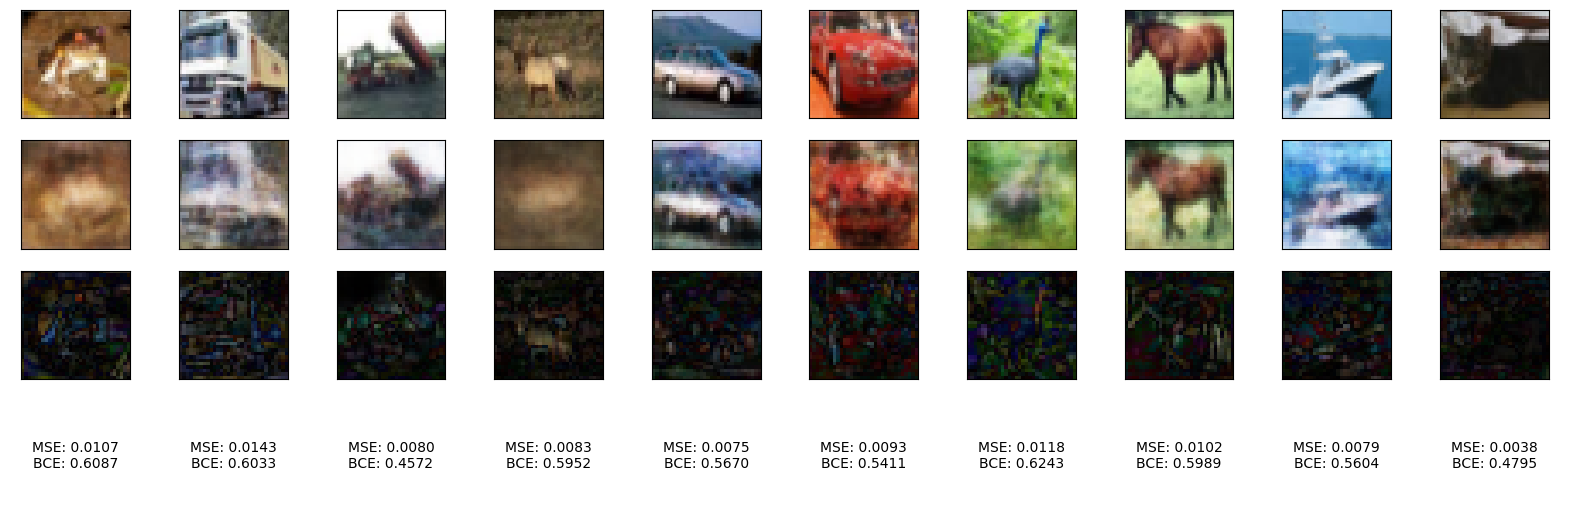

In [32]:
n = 10  # # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test[i]
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i]
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

**Variational Auto-Encoder (VAE) Implementation**

**Variational Auto-Encoder Model Architecture**

In [33]:
# Hyperparameters
batch_size = 32
original_dim = 3072  # 32*32*3
latent_dim = 4
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0

# Encoder network
x = Input(shape=(original_dim,), name='input')
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
z_mean = Dense(latent_dim, name='mean')(h)
z_log_var = Dense(latent_dim, name='log-variance')(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sample from the latent distribution
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(x, x_decoded_mean)

# Loss function: reconstruction loss + KL divergence
reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

**Compiling the Variational Auto-Encoder**

In [34]:
vae.compile(optimizer=Adam(learning_rate=0.0015))

In [35]:
x_train.shape

(10000, 32, 32, 3)

In [36]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

**Variational Auto-Encoder Model Training**

In [37]:
#Training the AutoEncoder Model
history = vae.fit(x_train_vae, x_train_vae, epochs=epochs, batch_size=batch_size, validation_data=(x_test_vae, x_test_vae))

Epoch 1/50
313/313 [==============================] - 4s 6ms/step - loss: 1994.3988 - val_loss: 1942.4781
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 1929.7745 - val_loss: 1934.9088
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 1923.8700 - val_loss: 1927.7571
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1921.4900 - val_loss: 1927.3077
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 1920.4297 - val_loss: 1927.2805
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 1919.8373 - val_loss: 1925.2454
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss: 1918.6526 - val_loss: 1927.0293
Epoch 8/50
313/313 [==============================] - 2s 5ms/step - loss: 1917.9739 - val_loss: 1925.4937
Epoch 9/50
313/313 [==============================] - 2s 5ms/step - loss: 1917.3005 - val_loss: 1923.9363
Epoch 10/50
313/313 [=========================

**Plot Training History**

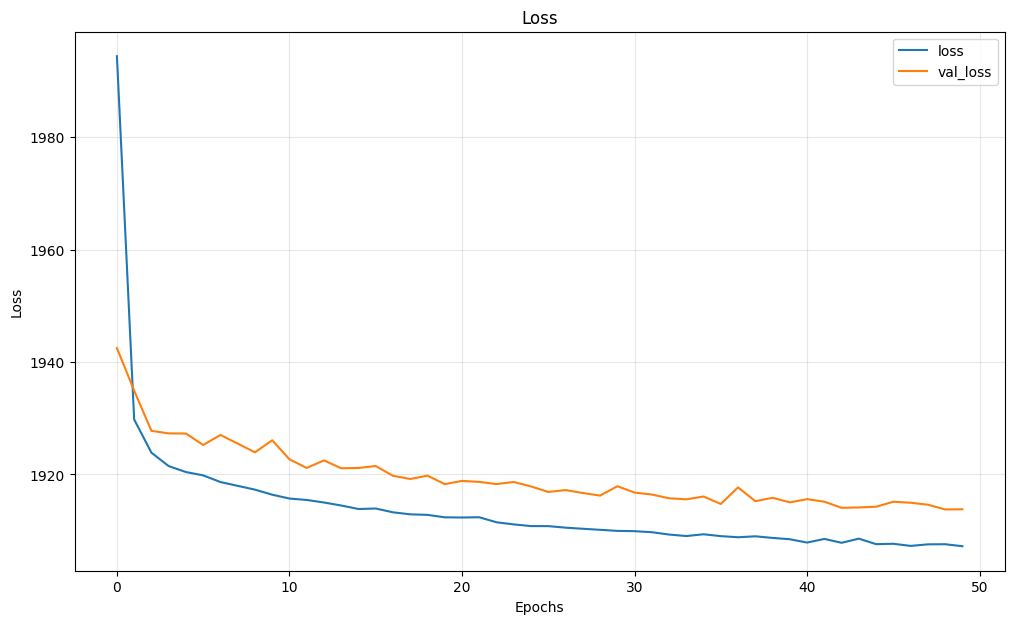

In [38]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

**Variational Auto-Encoder Evaluation**

In [39]:
results = vae.evaluate(x_test_vae, x_test_vae)
print("Test Loss VAE : ", results)

63/63 [==============================] - 0s 2ms/step - loss: 1913.8011
Test Loss VAE :  1913.8011474609375


**Variational Auto-Encoder Test Dataset Reconstruction**

In [40]:
x_test_pred = vae.predict(x_test_vae)

63/63 [==============================] - 0s 2ms/step


**Calculate Reconstruction Losses**

In [41]:
mse_loss, bce_loss = calculate_reconstruction_losses(x_test_vae, x_test_pred)
(mse_loss, bce_loss)

(0.029411782, 0.61974716)

**Reconstruction Quality : Variational Auto-Encoder**

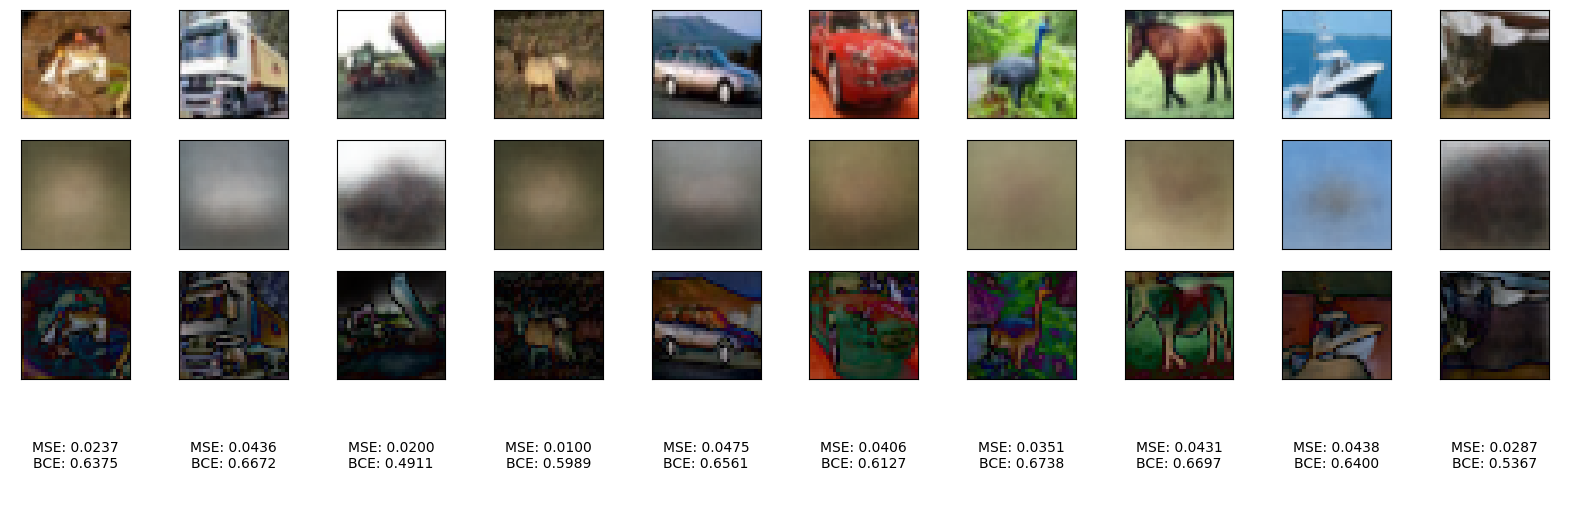

In [42]:
n = 10  # # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test_vae[i].reshape(32,32,3)
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i].reshape(32,32,3)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

**Hyperparameter Tuning**



```
# Hyperparameters Choosed : Intermediate Dimensionality, Encoding Dimensionility/ Latent Space Dimensionility, Learning Rate
```


In [43]:
def hyperparameter_tuning_strategy(cofig, x_train, x_test):
  intermediate_dim, latent_dim, learning_rate = config
  possible_combinations = list(itertools.product(intermediate_dim, latent_dim, learning_rate))
  print("*"*25)
  print(f"Possible No.of Combinations : {possible_combinations}")
  print("*"*25)
  hist = []
  for i in range(len(possible_combinations)):
    print("*"*25)
    print(f"Combination : {i+1}")
    print("*"*25)
    intermediate_dim, latent_dim, learning_rate = possible_combinations[i]
    # Hyperparameters
    batch_size = 32
    original_dim = 3072  # 32*32*3
    epochs = 50
    epsilon_std = 1.0

    # Encoder network
    x = Input(shape=(original_dim,), name='input')
    h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
    z_mean = Dense(latent_dim, name='mean')(h)
    z_log_var = Dense(latent_dim, name='log-variance')(h)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Sample from the latent distribution
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder network
    decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
    decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # VAE model
    vae = Model(x, x_decoded_mean)

    # Loss function: reconstruction loss + KL divergence
    reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer=Adam(learning_rate=learning_rate))
    #Training the AutoEncoder Model
    x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    history = vae.fit(x_train_vae, x_train_vae, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test_vae, x_test_vae))
    test_loss = vae.evaluate(x_test_vae, x_test_vae)
    hist.append(list((intermediate_dim, latent_dim, learning_rate, test_loss)))
    print(f"Combination : {i+1} -> {possible_combinations[i]}  test_mse : {test_loss}")
    print("*"*25)
    print("*"*25)
  return hist

**Different HyperParameter Cofigurations for Tuning**

In [44]:
config = [[256, 512], [4, 8], [0.001, 0.0015]]

hist = hyperparameter_tuning_strategy(config, x_train, x_test)

*************************
Possible No.of Combinations : [(256, 4, 0.001), (256, 4, 0.0015), (256, 8, 0.001), (256, 8, 0.0015), (512, 4, 0.001), (512, 4, 0.0015), (512, 8, 0.001), (512, 8, 0.0015)]
*************************
*************************
Combination : 1
*************************
Epoch 1/50
313/313 [==============================] - 3s 6ms/step - loss: 2000.8452 - val_loss: 1966.9631
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1936.1344 - val_loss: 1933.6001
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1925.0505 - val_loss: 1929.6765
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1922.5619 - val_loss: 1929.5186
Epoch 5/50
313/313 [==============================] - 1s 5ms/step - loss: 1921.5068 - val_loss: 1929.5338
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 1920.9196 - val_loss: 1928.2100
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss:

**Results Comparison on the basis of Validation Loss**

In [53]:
hist_hp_comb_vae = pd.DataFrame(hist, columns=["Intermediate Dimensionilty", "Latent Dimensionility Space", "Learning Rate", "Validation Loss VAE"])
hist_hp_comb_vae = hist_hp_comb_vae.sort_values(by=["Validation Loss VAE"], ascending=True)
hist_hp_comb_vae

,Intermediate Dimensionilty,Latent Dimensionility Space,Learning Rate,Validation Loss VAE
7,512,8,0.0015,1872.589478
3,256,8,0.0015,1875.962280
6,512,8,0.0010,1876.149048
2,256,8,0.0010,1877.181030
1,256,4,0.0015,1911.834351
5,512,4,0.0015,1912.414551
4,512,4,0.0010,1913.287842
0,256,4,0.0010,1915.013794


**Reconstruction Quality Changes After HyperParameter Tuning**

In [54]:
print("*"*25)
print(f"----Best Combination---- \n Intermediate Dimensionilty = {hist_hp_comb_vae.iloc[0,0]}\n Latent Dimensionility Space = {hist_hp_comb_vae.iloc[0,1]}\n Learning Rate = {hist_hp_comb_vae.iloc[0,2]}\n")
print("*"*25)
print("*"*25)
before_mse = np.round(results, 4)
after_mse = np.round(hist_hp_comb_vae.iloc[0, 3], 4)
print(f'Results Before Tunning:\n Test Loss MSE: {before_mse}\n')
print(f'Results After Tunning:\n Test Loss MSE: {after_mse}\n')
print(f'{np.round((before_mse-after_mse)*100/before_mse)}% Reconstruction Quality Improvement')

*************************
----Best Combination---- 
 Intermediate Dimensionilty = 512
 Latent Dimensionility Space = 8
 Learning Rate = 0.0015

*************************
*************************
Results Before Tunning:
 Test Loss MSE: 1913.8011

Results After Tunning:
 Test Loss MSE: 1872.5895

2.0% Reconstruction Quality Improvement


**Best Variational AutoEncoder Hyperparameters after Tuning**

In [55]:
intermediate_dim, latent_dim, learning_rate = list(hist_hp_comb_vae.iloc[0, :3])

**Variational Auto-Encoder (Best Hyperparameters) Architecture**

In [56]:
# Hyperparameters
batch_size = 32
original_dim = 3072  # 32*32*3
latent_dim = int(latent_dim)
intermediate_dim = int(intermediate_dim)
epochs = 50
epsilon_std = 1.0

# Encoder network
x = Input(shape=(original_dim,), name='input')
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)
z_mean = Dense(latent_dim, name='mean')(h)
z_log_var = Dense(latent_dim, name='log-variance')(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sample from the latent distribution
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae_best = Model(x, x_decoded_mean)

# Loss function: reconstruction loss + KL divergence
reconstruction_loss = binary_crossentropy(x, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_best.add_loss(vae_loss)
vae_best.compile(optimizer=Adam(learning_rate=learning_rate))

**Compiling the Variational Auto-Encode (Best Hyperparameters)r**

In [57]:
vae_best.compile(optimizer=Adam(learning_rate=learning_rate))

**Variational Autoencoder (Best Hyperparameters) - Encoder Model**

In [58]:
# Build a model to project inputs on the latent space
vae_encoder_best = Model(x, z_mean)

In [59]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

**Variational Auto-Encoder (Best Hyperparameters) Training**

In [60]:
#Training the AutoEncoder Model
history = vae_best.fit(x_train_vae, x_train_vae, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test_vae, x_test_vae))

Epoch 1/50
313/313 [==============================] - 3s 5ms/step - loss: 1970.4297 - val_loss: 1905.4768
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 1888.4224 - val_loss: 1894.9556
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 1884.1014 - val_loss: 1890.2654
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1882.6193 - val_loss: 1890.8774
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 1880.6637 - val_loss: 1888.1726
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1879.3157 - val_loss: 1885.6273
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 1878.2793 - val_loss: 1885.2317
Epoch 8/50
313/313 [==============================] - 1s 5ms/step - loss: 1877.9834 - val_loss: 1885.0000
Epoch 9/50
313/313 [==============================] - 1s 5ms/step - loss: 1876.7959 - val_loss: 1884.2783
Epoch 10/50
313/313 [=========================

**Plot Training History**

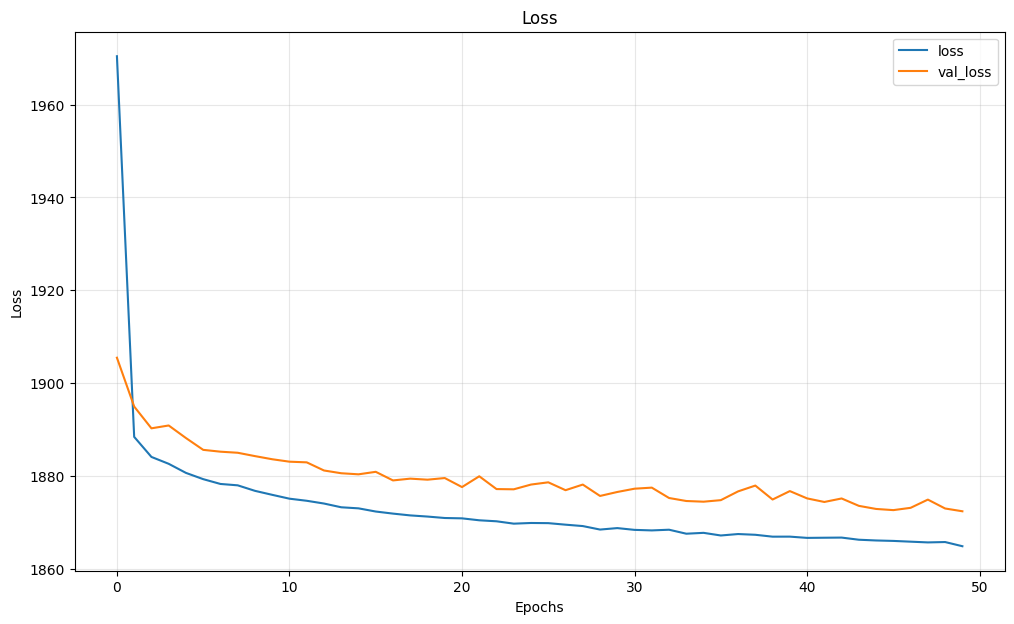

In [61]:
plt.figure(figsize=(12,7))

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

**Variational Auto-Encoder (Best Hyperparameters) Evaluation**

In [62]:
test_loss = vae_best.evaluate(x_test_vae, x_test_vae)
print("Test Loss : ", test_loss)

63/63 [==============================] - 0s 2ms/step - loss: 1872.3557
Test Loss :  1872.355712890625


**Variational Auto Encoder (Best Hyperparameters) Test Dataset Reconstruction**

In [63]:
x_test_pred = vae_best.predict(x_test_vae)

63/63 [==============================] - 0s 2ms/step


**Calculate Reconstruction Losses**

In [64]:
mse_loss, bce_loss = calculate_reconstruction_losses(x_test_vae, x_test_pred)
(mse_loss, bce_loss)

(0.022578761, 0.6040391)

**Reconstruction Quality : Variational Auto-Encoder (Best Hyperparameters)**

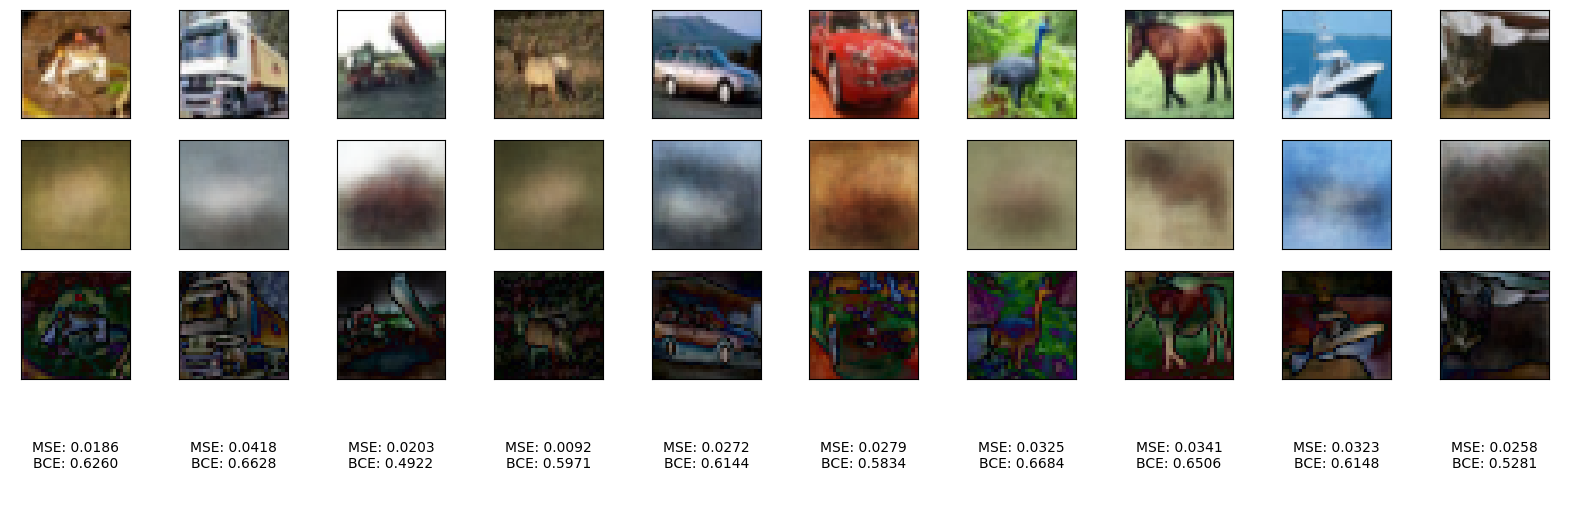

In [65]:
n = 10  # How many image rows, we will display
plt.figure(figsize=(20, 6 + 0.5))  # Adjust the figure size to accommodate three rows
for i in range(n):
    # Display original
    ax = plt.subplot(4, n, i + 1)
    original_img = x_test_vae[i].reshape(32,32,3)
    plt.imshow(original_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    reconstructed_img = x_test_pred[i].reshape(32,32,3)
    plt.imshow(reconstructed_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display difference
    ax = plt.subplot(4, n, i + 1 + n * 2)
    difference = np.abs(original_img - reconstructed_img)
    plt.imshow(difference)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Calculate losses
    mse_loss, bce_loss = calculate_reconstruction_losses(original_img, reconstructed_img)

    # Add captions with losses
    ax = plt.subplot(4, n, i + 1 + n * 3)
    plt.axis('off')
    loss_caption = f"MSE: {mse_loss:.4f}\nBCE: {bce_loss:.4f}"
    plt.text(0.5, 0.5, loss_caption, ha='center', va='center', fontsize=10, transform=ax.transAxes)

plt.show()

63/63 [==============================] - 0s 2ms/step


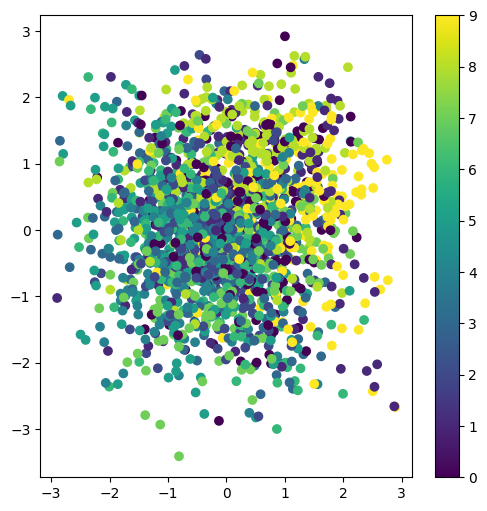

In [66]:
# Display a 2D plot of the digit classes in the latent space
x_test_encoded = vae_encoder_best.predict(x_test_vae, batch_size=batch_size)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [71]:
vae_encoder_best.predict(x_test_vae, batch_size=batch_size)

63/63 [==============================] - 0s 2ms/step


array([[-1.0385253 , -0.08857608,  0.0514134 , ...,  2.0830503 ,
        -0.32379696,  0.42851746],
       [-0.49222696,  1.3505127 , -0.18788107, ...,  0.06892461,
        -0.08465633,  0.9676734 ],
       [ 2.4422152 ,  1.1548109 ,  0.2546141 , ..., -0.42117172,
        -0.19391415,  0.6924721 ],
       ...,
       [-1.3642309 , -0.32106304,  1.2488811 , ..., -0.4705233 ,
        -0.28255787,  0.1360091 ],
       [-2.2325125 , -0.83840483, -0.18982592, ..., -0.8653172 ,
         0.42422593,  1.2250437 ],
       [ 0.6781236 ,  1.5810444 ,  1.1809344 , ..., -0.82380724,
         0.46542293,  1.0839959 ]], dtype=float32)

63/63 [==============================] - 0s 3ms/step


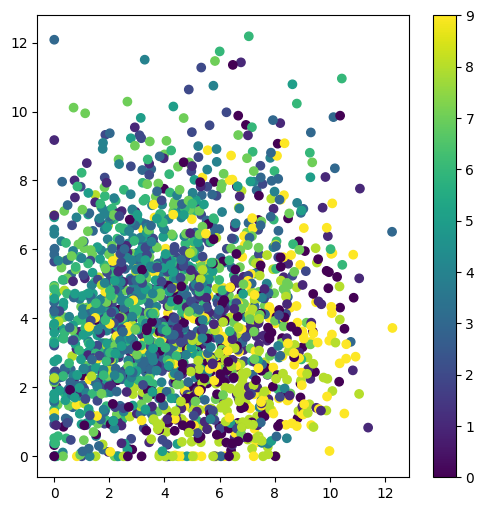

In [86]:
# Display a 2D plot of the digit classes in the latent space
x_test_encoded = ae_encoder_best.predict(x_test, batch_size=batch_size)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 7], x_test_encoded[:, 24], c=y_test)
plt.colorbar()
plt.show()

In [70]:
ae_encoder_best.predict(x_test, batch_size=batch_size)[1]

63/63 [==============================] - 0s 3ms/step


array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 4.126933 , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       4.154427 , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.2642764, 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 7.302153 , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 7.1110497, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [79]:
x_test_encoded[0:,87]

array([5.095921 , 2.3887672, 3.9114509, ..., 2.834512 , 2.1729057,
       2.6173863], dtype=float32)